In [1]:
from IPython.display import display, Image
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.19.2
3.3.2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn

w[0]: 0.393906  b: -0.031804


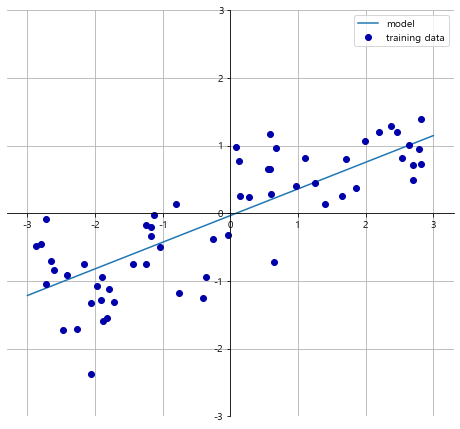

In [5]:
mglearn.plots.plot_linear_regression_wave()

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()
X = boston.data
y = boston.target

### 데이터 나누기
 * 학습 데이터
 * 테스트 데이터

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state=42)



In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [11]:
### MAE : mean absolute error
### MSE : mean squared error
### RMSE : root mean squared error
### RMLSE :root mean squared Logarithmic error

In [12]:
import pandas as pd

In [17]:
dict_dat = {'실제값':y_test, '예측값':pred,
           '오차':y_test - pred, '오차절대값' : abs(y_test-pred),
           '오차제곱':(y_test - pred)**2}
dat = pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차,오차절대값,오차제곱
0,23.6,28.648960,-5.048960,5.048960,25.491998
1,32.4,36.495014,-4.095014,4.095014,16.769138
2,13.6,15.411193,-1.811193,1.811193,3.280421
3,22.8,25.403213,-2.603213,2.603213,6.776718
4,16.1,18.855280,-2.755280,2.755280,7.591567
...,...,...,...,...,...
147,17.1,17.403672,-0.303672,0.303672,0.092216
148,14.5,13.385941,1.114059,1.114059,1.241127
149,50.0,39.983425,10.016575,10.016575,100.331779
150,14.3,16.682863,-2.382863,2.382863,5.678036


In [18]:
dat.shape

(152, 5)

In [20]:
### MAE
mae_val = dat['오차절대값'].sum()/dat.shape[0]
mae_val

3.1627098714573627

In [21]:
### MSE
mse_val = dat['오차제곱'].sum()/dat.shape[0]
mse_val

21.51744423117691

In [22]:
### RMSE
mse_vall = dat['오차제곱'].sum()/dat.shape[0]
rmse_val = mse_val ** 0.5
rmse_val

4.6386899261727885

In [28]:
# ### RMLSE
# msle_val = dat['log오차제곱'].sum()/dat.shape[0]
# rmlse_val = msle_val ** 0.5
# rmlse_val

In [25]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error( abs(y_test), abs(pred) )
msle

0.08173710601527695

In [26]:
msle ** 0.5

0.2858970199482271

In [29]:
# R^2의 값을 구하기- 결정계수 구하기
print("훈련 데이터 세트 점수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(model.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.74
테스트 데이터 세트 점수 : 0.71


In [30]:
for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred[:5]
    mae = np.abs(y_test - pred).sum() / len(pred)
    mse = ((y_test - pred)**2).sum()/len(pred)
    rmse = (((y_test - pred)**2).sum()/len(pred))**0.5
    print("test_size : ",(i/10))
    print("MAE : {:.3f}".format(mae))
    print("MSE : {:.3f}".format(mse))
    print("RMSE : {:.3f}".format(rmse))
    print("")

test_size :  0.1
MAE : 2.834
MSE : 14.996
RMSE : 3.872

test_size :  0.2
MAE : 3.189
MSE : 24.291
RMSE : 4.929

test_size :  0.3
MAE : 3.163
MSE : 21.517
RMSE : 4.639

test_size :  0.4
MAE : 3.298
MSE : 21.833
RMSE : 4.673

test_size :  0.5
MAE : 3.398
MSE : 25.175
RMSE : 5.018

